In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [214]:
file1 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

# Deviding to numerical & categorical

In [6]:
df_numerical = file1.select_dtypes(include='int64')
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [7]:
df_numerical.sort_values('total_claim_amount')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
4485,2494,45855,62,0,26,1,1,0
2759,4538,82297,116,24,62,0,1,0
10317,3969,49544,101,3,29,0,1,0
3628,5004,86834,64,2,93,0,8,0
6865,6186,88375,77,23,11,0,3,0
...,...,...,...,...,...,...,...,...
1316,32104,89546,266,4,18,1,2,2452
8007,43217,51504,220,30,99,0,2,2552
9614,43217,51504,220,30,99,0,2,2552
7734,9295,47772,261,33,44,0,1,2759


# Ploting distribution


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

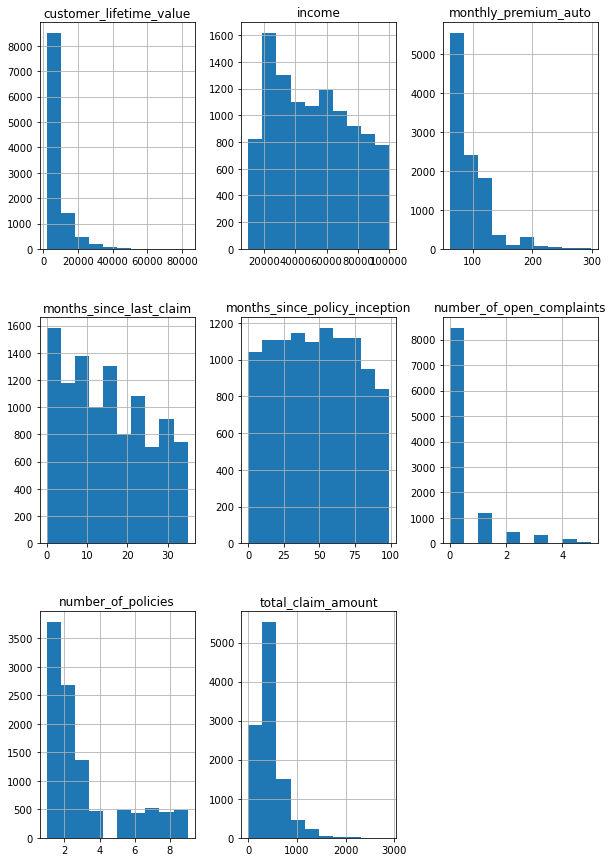

In [8]:
df_numerical.hist(figsize=(10,15))




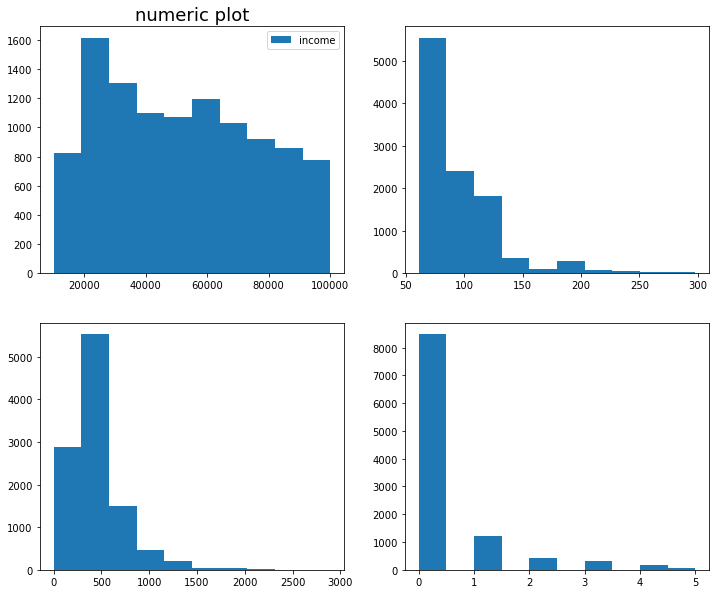

In [9]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

# we add a title to the figure or the ax
ax[0,0].set_title('numeric plot', fontsize=18)

ax[0,0].hist(df_numerical['income'],label='income')
ax[0,1].hist(df_numerical['monthly_premium_auto'],label='monthly_premium_auto')
ax[1,1].hist(df_numerical['number_of_open_complaints'],label='number_of_open_complaints')
ax[1,0].hist(df_numerical['total_claim_amount'],label='total_claim_amount')

# we add the legend
ax[0,0].legend()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

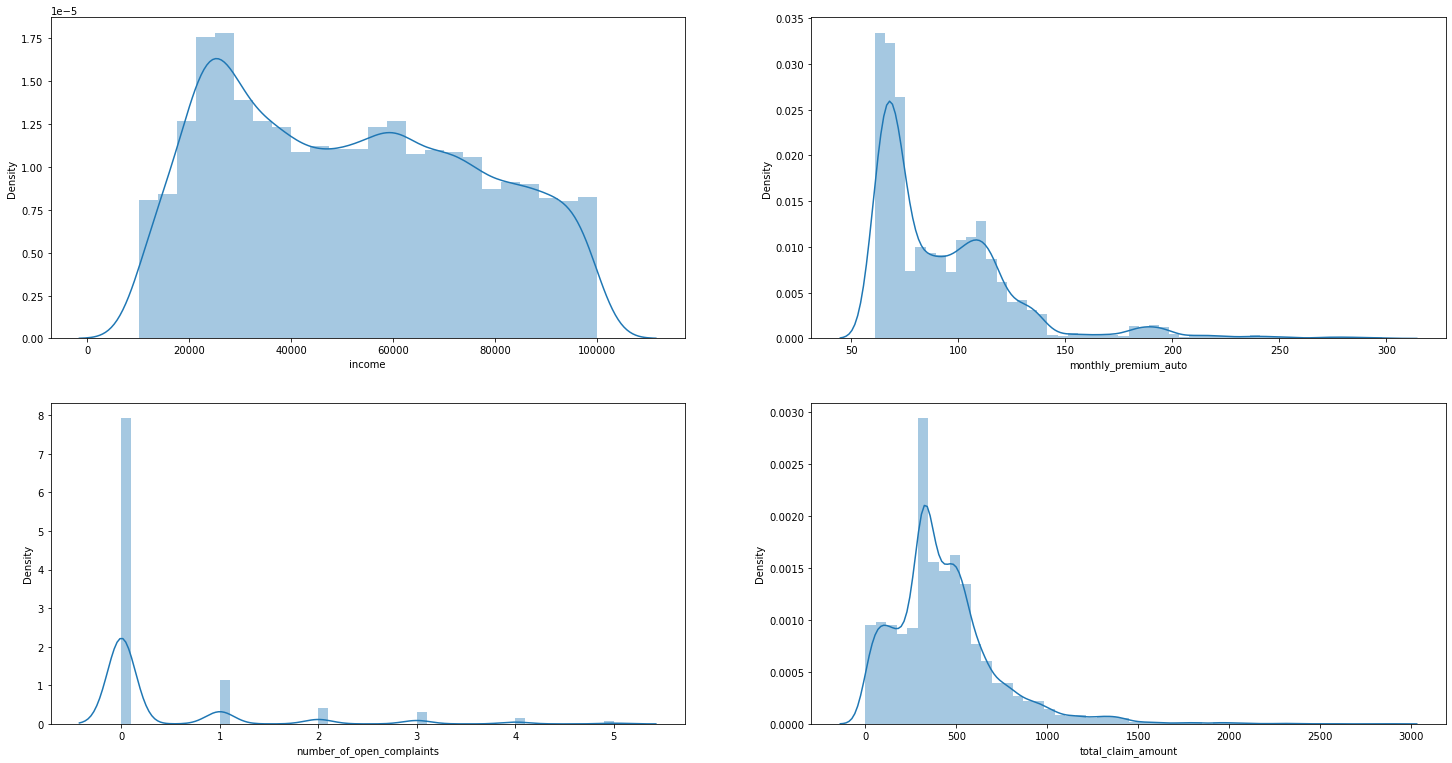

In [10]:
fig1,axel=plt.subplots(2,2,figsize=(25,13))
sns.distplot(df_numerical.income, ax=axel[0,0])
sns.distplot(df_numerical.monthly_premium_auto, ax=axel[0,1])
sns.distplot(df_numerical.number_of_open_complaints, ax=axel[1,0])
sns.distplot(df_numerical.total_claim_amount, ax=axel[1,1])



# Correlation Heatmap

In [11]:
df_numerical1 = df_numerical.drop('total_claim_amount',axis=1) # Droping the target feature

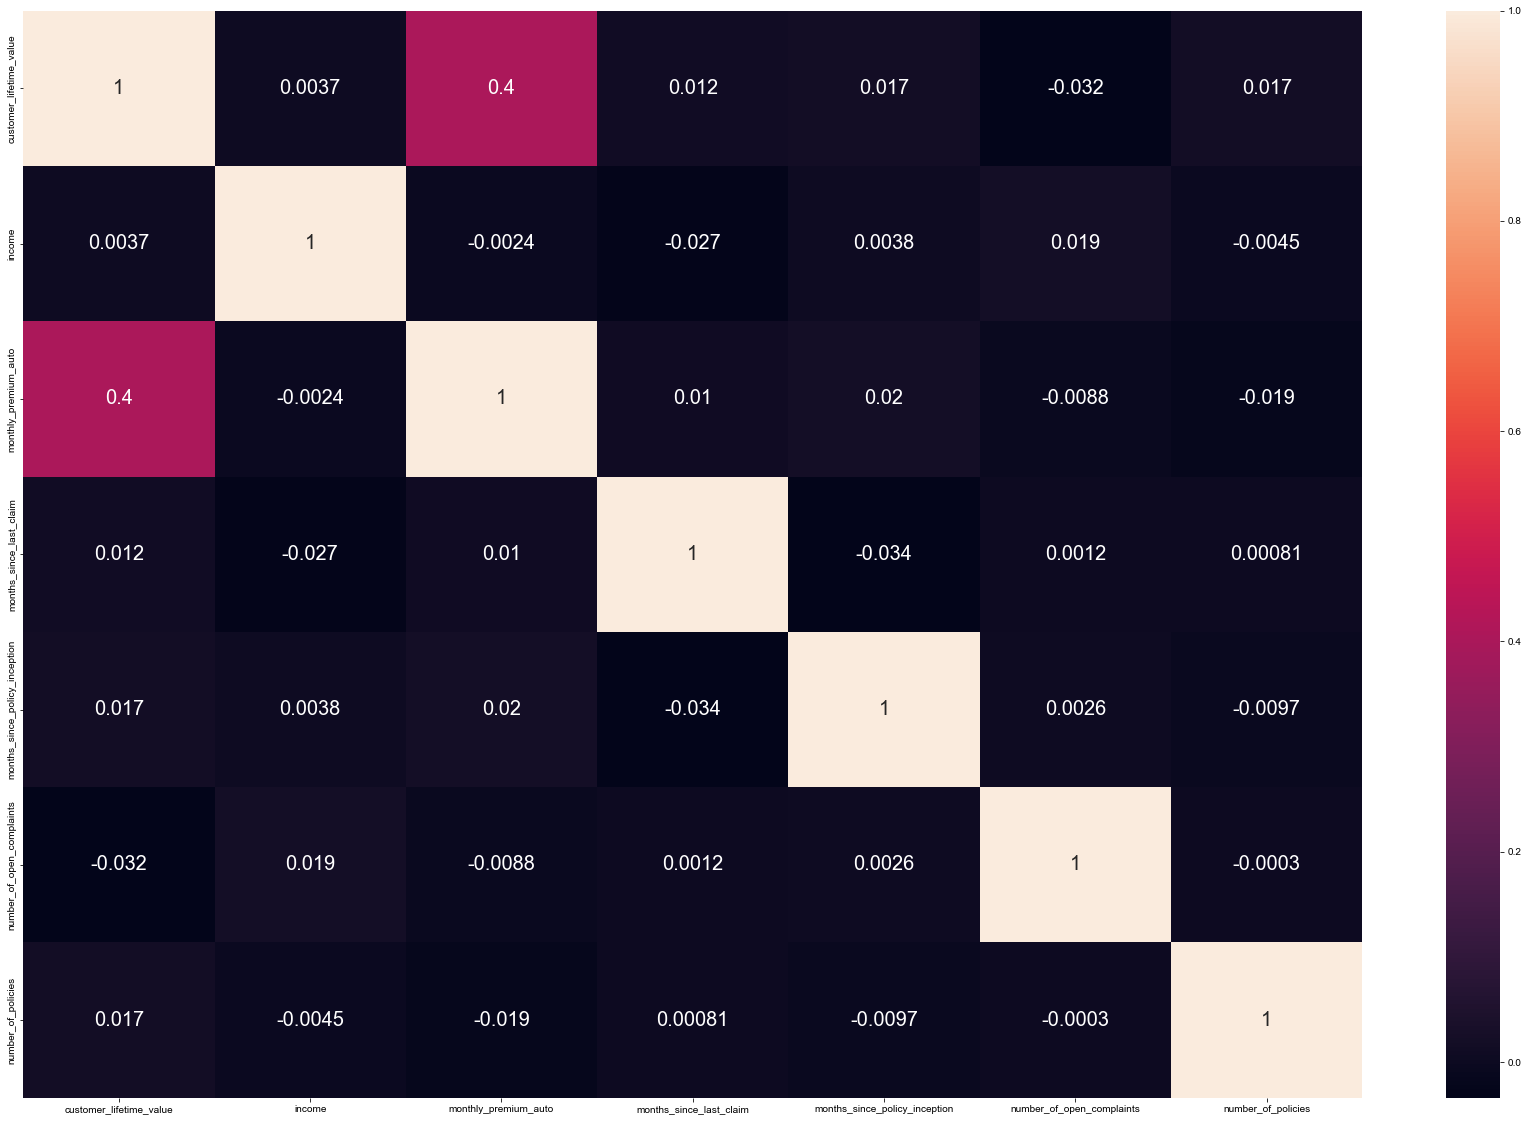

In [12]:
fig2=plt.figure(figsize=(30,20))
sns.heatmap(df_numerical1.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=5)

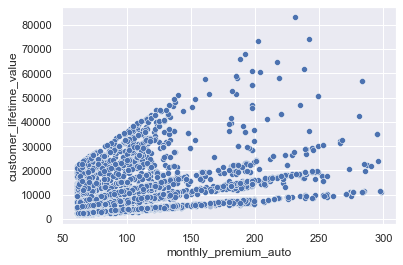

In [19]:
sns.scatterplot(x=df_numerical1.monthly_premium_auto,y=df_numerical1.customer_lifetime_value)
sns.set(font_scale=0.1)

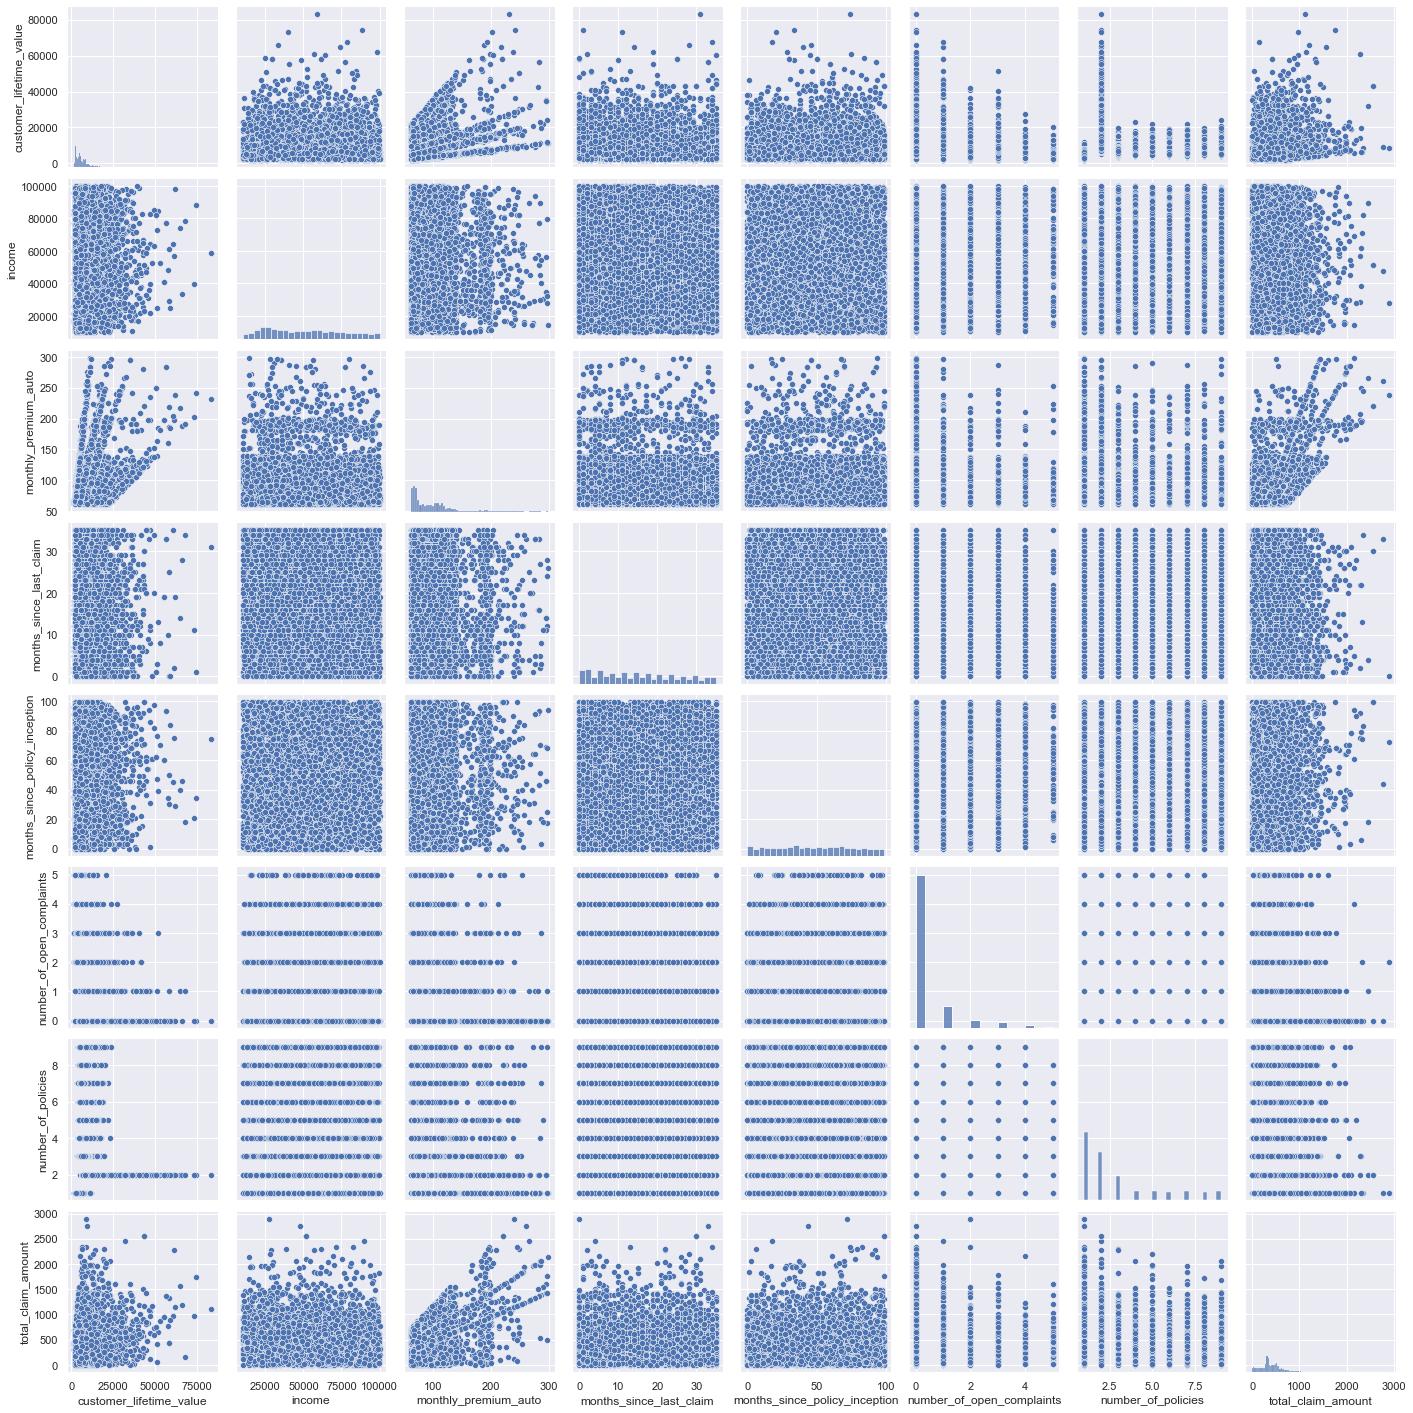

In [14]:
sns.pairplot(df_numerical)

# total number of responses

In [63]:
respond=file1.groupby('response')['response'].count()

<AxesSubplot:xlabel='response', ylabel='count'>

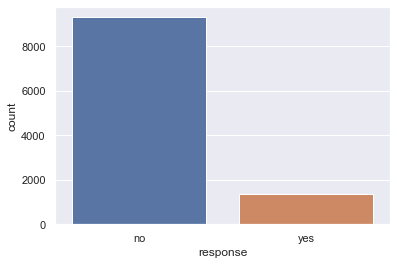

In [17]:
sns.countplot(data=file1,x='response')

In [168]:
respond1=pd.DataFrame(file1.groupby(['response','sales_channel'])['response'].count())
respond1

response
response sales_channel          
no       agent              3340
         branch             2665
         call center        1890
         web                1421
yes      agent               679
         branch              310
         call center         209
         web                 175

# Response by the sales channel

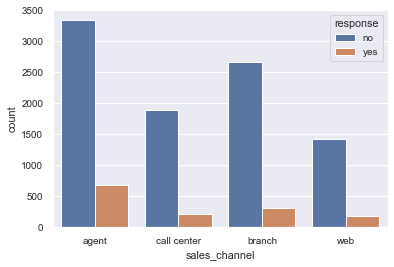

In [160]:
sns.countplot(data=file1,x='sales_channel', hue='response')
sns.set(font_scale=0.9)


* Show a plot of the response by the total claim amount.


In [127]:
respond2=pd.DataFrame(file1.groupby(['response','income','sales_channel'])['response'].count())
respond2

response
response income sales_channel          
no       10037  call center           1
         10074  web                   1
         10088  agent                 1
         10097  web                   2
         10105  branch                1
...                                 ...
yes      98714  agent                 1
         99196  web                   1
         99265  agent                 1
         99742  agent                 1
         99845  branch                7

[8634 rows x 1 columns]

# Response by the total claim amount

In [293]:
groups = file1.groupby(['response', pd.cut(file1.total_claim_amount, [0, 500, 1000, 1500, 2000, 2500, 3000])])
groups.size().reset_index()


,response,total_claim_amount,0
0,no,"(0, 500]",6361
1,no,"(500, 1000]",2534
2,no,"(1000, 1500]",331
3,no,"(1500, 2000]",59
4,no,"(2000, 2500]",18
5,no,"(2500, 3000]",4
6,yes,"(0, 500]",882
7,yes,"(500, 1000]",428
8,yes,"(1000, 1500]",62
9,yes,"(1500, 2000]",1


In [373]:
file1['new_total_claim_amount'] = pd.cut(x=file1['total_claim_amount'], bins=[0,500, 1000, 1500, 2000, 2500, 3000],
                    labels=['500','1000','1500','2000','2500','3000'])
file1

new_total_claim_amount=file1.groupby(['new_total_claim_amount','response'])['response'].count().rename('count').reset_index()
new_total_claim_amount

,new_total_claim_amount,response,count
0,500,no,6361
1,500,yes,882
2,1000,no,2534
3,1000,yes,428
4,1500,no,331
5,1500,yes,62
6,2000,no,59
7,2000,yes,1
8,2500,no,18
9,2500,yes,0


<AxesSubplot:xlabel='new_total_claim_amount', ylabel='count'>

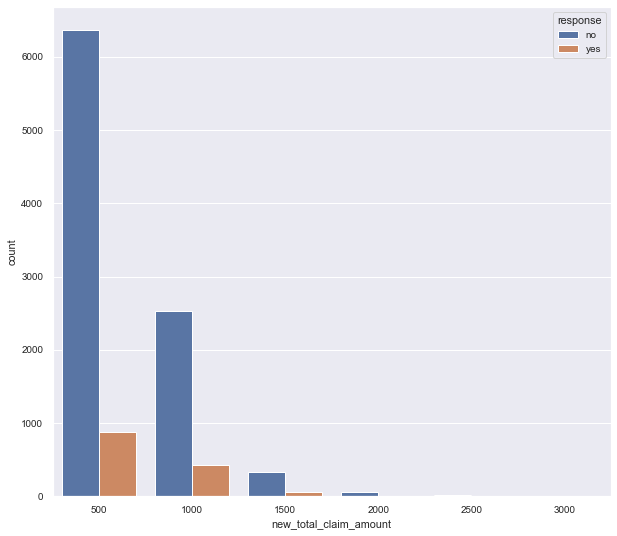

In [380]:
plt.figure(figsize=(10,9))
plt.subplot()

sns.barplot(x = new_total_claim_amount['new_total_claim_amount'],y = new_total_claim_amount['count'], hue = new_total_claim_amount['response'])

# response by income

In [382]:
file1['new_income'] = pd.cut(x=file1['income'], bins=[0,20000, 40000, 60000, 80000, 100000],
                    labels=['20000','40000','60000','80000','10000'])
file1

new_income=file1.groupby(['new_income','response'])['response'].count().rename('count').reset_index()
new_income

,new_income,response,count
0,20000,no,743
1,20000,yes,186
2,40000,no,2738
3,40000,yes,469
4,60000,no,2143
5,60000,yes,262
6,80000,no,2043
7,80000,yes,287
8,10000,no,1649
9,10000,yes,169


<AxesSubplot:xlabel='new_income', ylabel='count'>

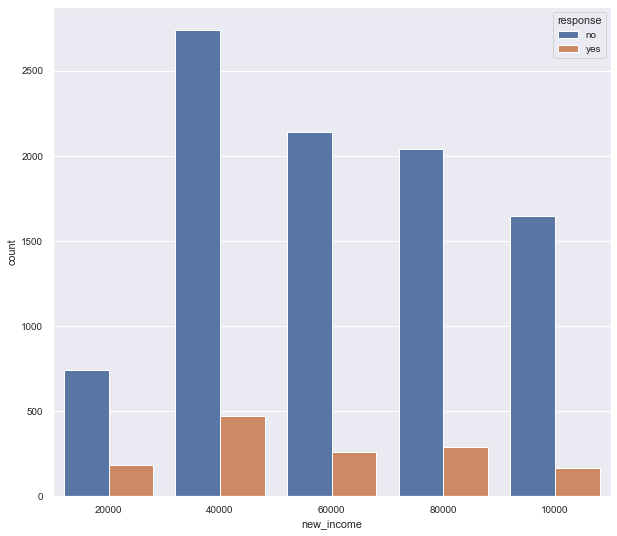

In [383]:
plt.figure(figsize=(10,9))
plt.subplot()

sns.barplot(x = new_income['new_income'],y = new_income['count'], hue = new_income['response'])